Import the datasets using the pandas library then perform a summary description to get a grasp on the data values, types, missing values etc.

In [278]:
# Import the pandas library
import pandas as pd

# import the csv files
app_info_series = pd.read_csv('app_info.csv')
app_reviews_series = pd.read_csv('app_reviews.csv')

**Question 1:**

Open up the data, do some initial exploratory data analysis (EDA) and gather some business insights on this data. Are there any problems with how data collected that would affect your ability to do proper analysis on this dataset? Please provide your findings in the jupyter notebook itself. 

In [279]:
# describe app_info
app_info_series.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**app_info** --- dataset summary description

The first notable issue that can interfere with the analysis is **missing data**. We will have to make a decision on how we go about it later on, depending on what we're trying to achieve, but for now we have established that the datasets are not complete

Breaking down the data:
There's 9660 **unique apps**, top app being **ROBLOX**, top category being **FAMILY** etc. We can also see that the ratings have a maximumm of 19 which looks like an **outlier** since the vast majority values seem to be between 1 and 5. Again, depending what is the purpose of the data, outliers will have to be dealt with in a manner consistent with the end goal of data.

In [280]:
# describe app_reviews
app_reviews_series.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


**app_reviews** --- dataset summary description

As with the previous dataset, we're missing data: we can see that out of 64,295 entries, only 37,432 contain a sentiment score and 37,427 have translations. So rougly, 40% of the data is missing

In [281]:
# to perform the percentage calculation we'll drop the lines with no information since they're not relevant 
app_reviews_df = pd.DataFrame(app_reviews_series)
app_reviews_df.dropna(inplace=True)
app_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


**Question 2:**

Write a statement to return the percentage of positive, negative, and neutral sentiment reviews for each application. Show your results in a visualization of your choice         

In [282]:
app_rev = app_reviews_df.groupby(['App', 'Sentiment']).count()
app_rev = app_rev['Translated_Review']
app_rev = app_rev.reset_index()
app_rev = app_rev.pivot(index = 'App', columns = 'Sentiment', values='Translated_Review')
app_rev['Total_Reviews'] = app_rev[['Negative', 'Neutral','Positive']].sum(axis=1)
app_rev['p_positive'] = app_rev["Positive"]/app_rev['Total_Reviews']
app_rev['p_neutral'] = app_rev["Neutral"]/app_rev['Total_Reviews']
app_rev['p_negative'] = app_rev["Negative"]/app_rev['Total_Reviews']
app_rev = app_rev.reset_index()
app_rev.head()

Sentiment,App,Negative,Neutral,Positive,Total_Reviews,p_positive,p_neutral,p_negative
0,10 Best Foods for You,10.0,22.0,162.0,194.0,0.835052,0.113402,0.051546
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0,40.0,0.775000,0.200000,0.025000
2,11st,7.0,9.0,23.0,39.0,0.589744,0.230769,0.179487
3,1800 Contacts - Lens Store,6.0,10.0,64.0,80.0,0.800000,0.125000,0.075000
4,1LINE – One Line with One Touch,8.0,3.0,27.0,38.0,0.710526,0.078947,0.210526


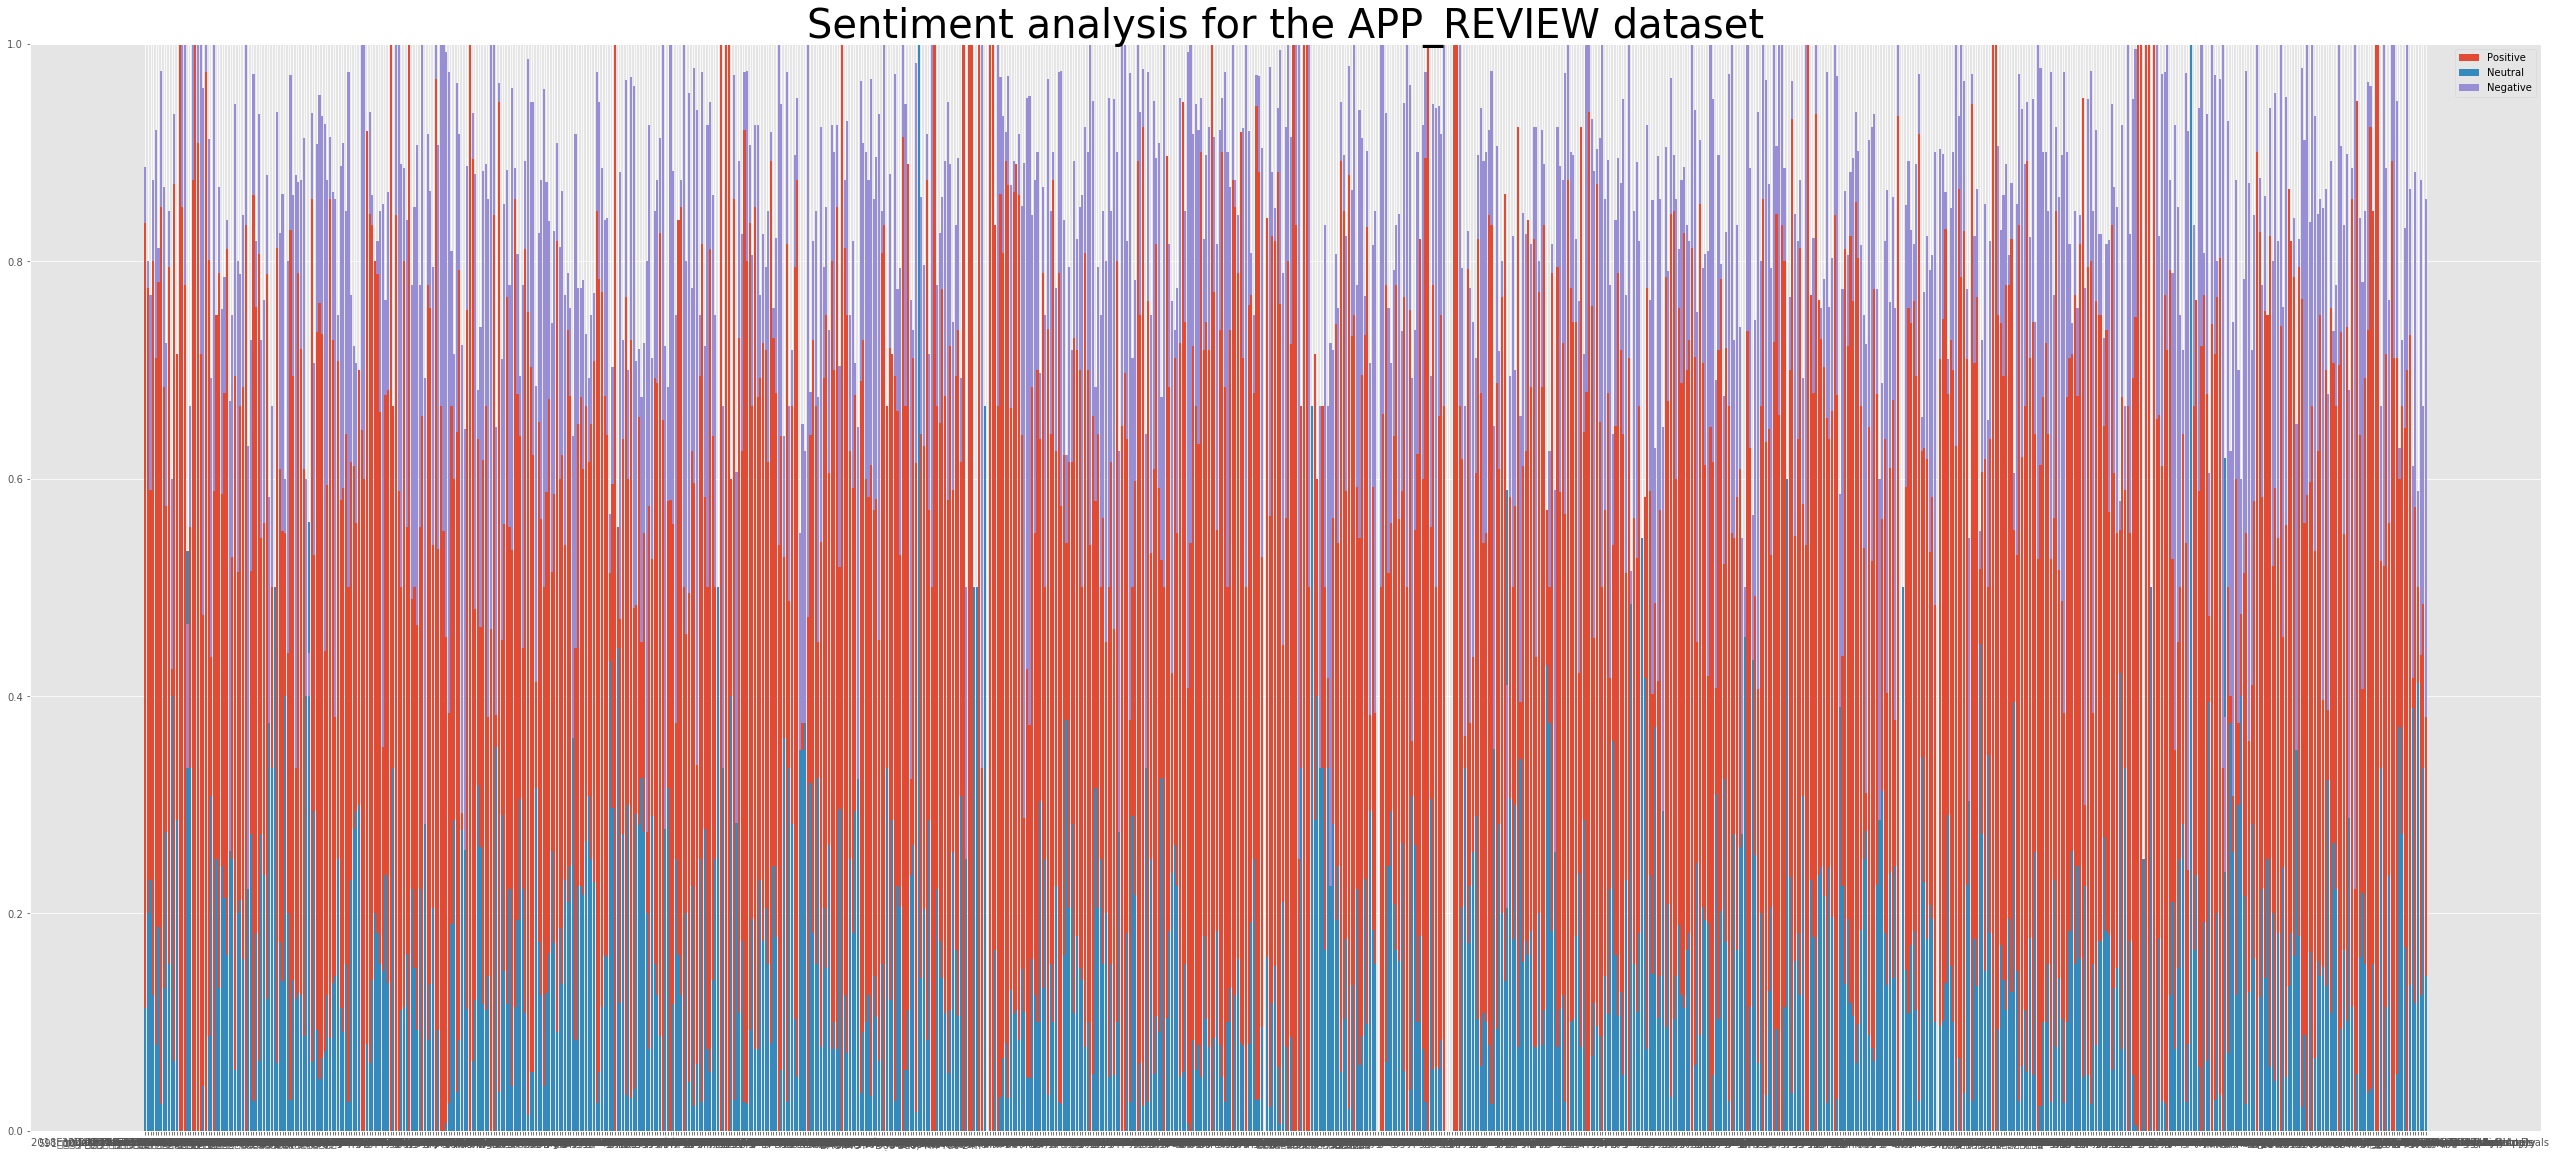

In [283]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(45,20))

pos = app_rev['p_positive']
neu = app_rev['p_neutral']
neg = app_rev['p_negative']

p1 = plt.bar(x=app['App'], height=pos)
p2 = plt.bar(x=app['App'], height=neu)
p3 = plt.bar(x=app['App'], height=neg, bottom = pos)

plt.legend((p1[0], p2[0], p3[0]), ('Positive', 'Neutral', 'Negative'))
plt.title('Sentiment analysis for the APP_REVIEW dataset', fontsize = 40)
plt.show()

Without a filtering mechanism (number of reviews for example), there's simply too many apps to visualize the entire dataset in a way conducive to any salient analysis.

**Question 3:**

Find the ratings of the top 10 applications which have the most installs

In [284]:
app_info_df.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Number_Installs      int64
dtype: object

Data type for "Installs" need to be converted to integer to do a Top 10 sorting. We'll create a dictionary and then cycle through a list comprehension to create sortable values in the dataframe itself

In [285]:
app_info_df = pd.DataFrame(app_info_series)
# create a dictionary
install_dict = {'1,000,000,000+':1000000000,'500,000,000+':500000000,'100,000,000+':100000000,\
                '50,000,000+':50000000,'10,000,000+':10000000,'5,000,000+':5000000,'1,000,000+':1000000,\
                '500,000+':500000,'100,000+':100000,'50,000+':50000,'10,000+':10000,'5,000+':5000,'1,000+':1000\
               ,'500+':500,'100+':100,'50+':50,'10+':10}
import warnings
warnings.simplefilter("ignore")

app_inf_trim = app_info_df
app_inf_trim['Number_Installs'] = [install_dict[k] if k in [i[0] for i in install_dict.items()] else 5 for k in app_info_df['Installs']]
app_info_sorted = app_inf_trim.sort_values(['Number_Installs'], ascending=False)
app_info_sorted.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Number_Installs
3896,Subway Surfers,GAME,4.5,27711703,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1000000000
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
3523,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,"1,000,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,1000000000
3565,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,"1,000,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,1000000000
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,1000000000
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,1000000000
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,1000000000
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,1000000000


Above the Top 10 apps by number of installs, as per the ask in Question 3

**Question 4:**

If a company is looking to develop the next top trending application on the Google Play Store, what kind of app should they focus on building? Why? (ie. does number of installs correlate with a higher rating? Or perhaps number of reviews, or overall sentiment?) Present the data findings to back your claim. Use notebook for both results and explanation. 

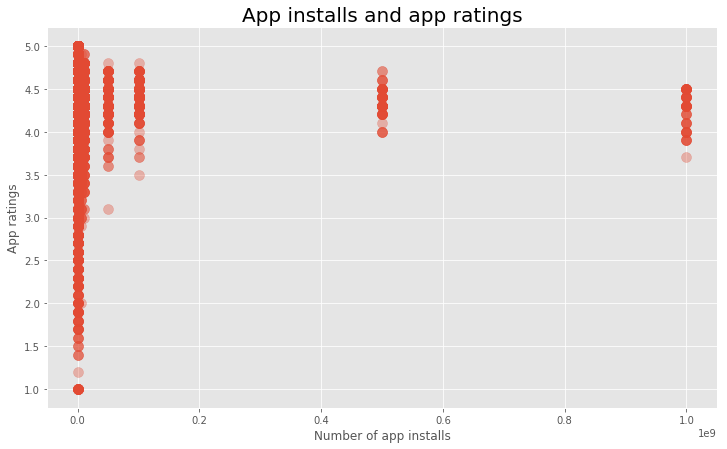

In [286]:
# let's see how installs correlate with ratings
plt.style.use('ggplot')
ratings = app_info_sorted['Rating'][app_info_sorted['Rating']<=5]
installs = app_info_sorted['Number_Installs'][app_info_sorted['Rating']<=5]

plt.figure(figsize=(12,7))
plt.scatter(installs, ratings, alpha=.35, s = 100)
plt.title('App installs and app ratings', fontsize = 20)
plt.xlabel('Number of app installs')
plt.ylabel('App ratings')
plt.show()

The number of installs correlates positively with the rating, that can be seen clearly in the plot above. Also the **rating range** is narrower (the rating variance is smaller) the higher the number of installs which means users agree with the ratings of other users for those apps with a high download rate. So we can conclude fairly confidently that a high rate of downloads is indicative of a high rating.

Find the Top 20 apps by number of installs and by reviews and get the Category and Genre

In [287]:
app_info_sorted = app_inf_trim.sort_values(['Number_Installs', 'Rating'], ascending=False)
app_info_sorted.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Number_Installs
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
1700,Subway Surfers,GAME,4.5,27723193,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
1750,Subway Surfers,GAME,4.5,27724094,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
1872,Subway Surfers,GAME,4.5,27725352,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
1917,Subway Surfers,GAME,4.5,27725352,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1000000000
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1000000000
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1000000000
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,1000000000
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,1000000000


Recommendation:

For a top trending status, the company should target building apps in category/genre 'GAME/Arcade','SOCIAL','PHOTOGRAPHY'

**Question 5:**

Use dataframes, for instance, pandas: Find the top rated application name and its rating for each category. If there are ties, return all tied applications. (ie: the top application in the category ART_AND_DESIGN is “Spring flowers theme couleurs d t space” with a rating of 5.0.)

We'll create a dataframe with the top rating for each category then do a inner join with the original dataframe to retain only the top rated apps

In [288]:
# df with max rating for each category + removing of outiers
top_by_category = app_info_df[app_info_df['Rating'] <=5.].groupby(['Category'])['Rating'].max()

top_by_category = top_by_category.reset_index()
top_by_category = top_by_category.sort_values(['Rating'], ascending=False)
top_by_category.columns=['Category','Rating']
top_by_category

,Category,Rating
0,ART_AND_DESIGN,5.0
14,GAME,5.0
28,SPORTS,5.0
27,SOCIAL,5.0
26,SHOPPING,5.0
25,PRODUCTIVITY,5.0
24,PHOTOGRAPHY,5.0
23,PERSONALIZATION,5.0
22,PARENTING,5.0
21,NEWS_AND_MAGAZINES,5.0


In [289]:
top_apps =  app_info_df.merge(top_by_category, how='inner', on=['Category','Rating'])
top_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Number_Installs
0,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up,100000
1,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,100000
2,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,100000
3,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up,1000000
4,MHD F-Series,AUTO_AND_VEHICLES,4.9,73,23M,"1,000+",Free,0,Everyone,Auto & Vehicles,"June 5, 2018",version 0.994,3.2 and up,1000
5,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,"1,000,000+",Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up,1000000
6,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up,1000
7,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12M,"5,000+",Free,0,Everyone,Comics,"July 31, 2018",1.0.5,5.0 and up,5000
8,American Girls Mobile Numbers,DATING,5.0,5,4.4M,"1,000+",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up,1000
9,Awake Dating,DATING,5.0,2,70M,100+,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up,100
